# カーネル密度推定
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use("ggplot")

滑らかなヒストグラムを作る！らしい
正規分布を足し合わせるイメージ

In [3]:
dataset = randn(25)

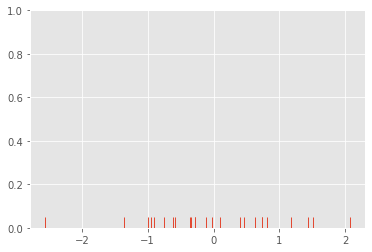

In [4]:
sns.rugplot(dataset)

(array([1., 0., 1., 4., 6., 3., 3., 3., 3., 1.]),
 array([-2.55688584, -2.09428364, -1.63168144, -1.16907924, -0.70647703,
        -0.24387483,  0.21872737,  0.68132957,  1.14393177,  1.60653397,
         2.06913617]),
 <a list of 10 Patch objects>)

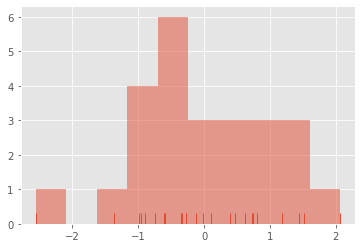

In [5]:
sns.rugplot(dataset)
plt.hist(dataset, alpha=0.5)

## バンド幅
https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

$h = (\frac{4\sigma^5}{3n})^{\frac{1}{5}}$

多分この式

(0, 1)

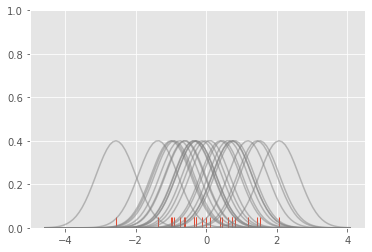

In [6]:
sns.rugplot(dataset)

# グラフ描画用にX軸の幅を最大値と最小値より少し大きくとり、１００等分する。
x_min = dataset.min() -2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

# バンド幅の設定、理論は良く分からない
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    # σ＝バンド幅
    # カーネルの作成
    # 今回は良く使われる正規分布を使う
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # プロット時に高さを揃える
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color="gray", alpha=0.5)
# Y軸の範囲を設定する。
plt.ylim(0,1)


### バンド幅を足し合わせる

Text(0.5, 0.98, 'Sum of the Basic Functions')

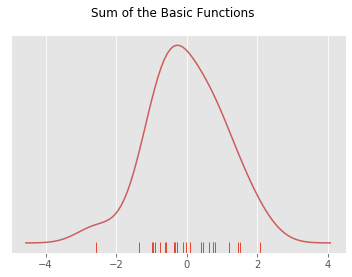

In [7]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color="indianred")
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basic Functions')

### KDEはseabornを使うと1行で書ける

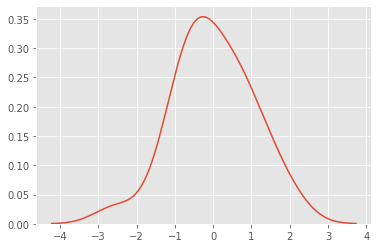

In [8]:
sns.kdeplot(dataset)

## バンド幅を変えた場合のKDE

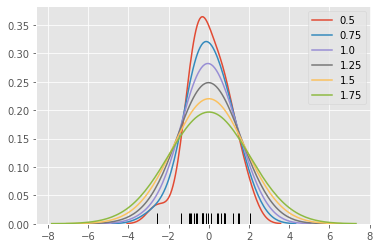

In [9]:
# ラグプロット
sns.rugplot(dataset, color="black")

# バンド幅を変えてKDEを描画
for bw in np.arange(0.5, 2.0, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

- バンド幅はそのデータポイントの影響がどれだけ強いかというイメージ。
- バンド幅を大きくすると、そのデータポイントの影響が強くなり、データが広がる。イメージ。

# 色々なカーネル密度関数
https://en.wikipedia.org/wiki/Kernel_(statistics)

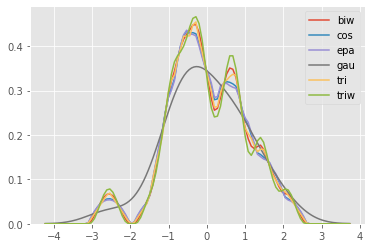

In [11]:
kernel_optinos = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_optinos:
    sns.kdeplot(dataset, kernel=kern, label=kern)

カーネル関数に応じて、グラフの形が変わる

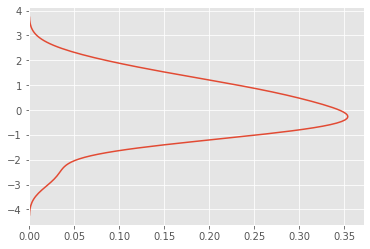

In [12]:
# 軸を入れ替えることも可能
sns.kdeplot(dataset, vertical=True)

## 累積分布関数
## （Cumulative distributuin function CDF)

(array([ 1.,  1.,  2.,  6., 12., 15., 18., 21., 24., 25.]),
 array([-2.55688584, -2.09428364, -1.63168144, -1.16907924, -0.70647703,
        -0.24387483,  0.21872737,  0.68132957,  1.14393177,  1.60653397,
         2.06913617]),
 <a list of 10 Patch objects>)

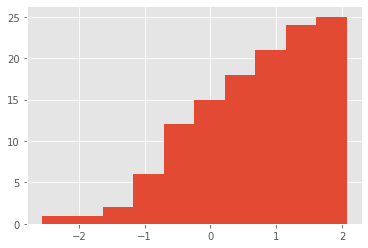

In [14]:
plt.hist(dataset, cumulative=True)

- seabornを使うと滑らかに書ける。
- なんかロジスティックとかシグモイドに似てる。

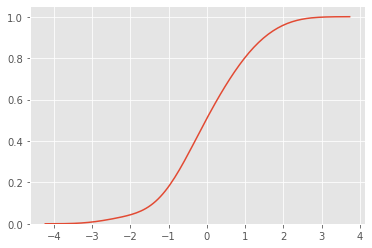

In [15]:
sns.kdeplot(dataset, cumulative=True)

In [16]:
# 多変量のグラフ
# 平面用に、ひとまず２次元
mean = [0,0]
cov = [[1,0], [0, 100]]
# 多変量の正規分布、meanは各次元の平均値、covは分散共分散行列
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

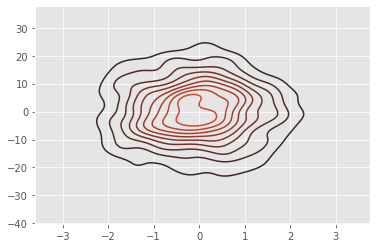

In [18]:
df = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(df)
# ちなみに、この書き方はsns的に、将来のバージョンではエラーになるかもしれないらしい

- 軸ごとにデータを渡す書き方

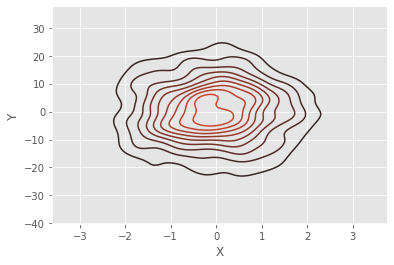

In [19]:
sns.kdeplot(df.X, df.Y)

- 影をつけることもできる

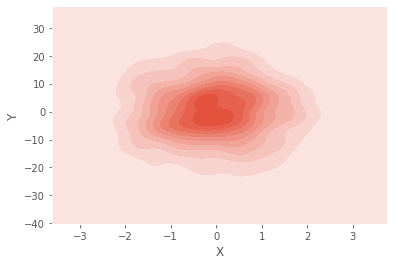

In [21]:
sns.kdeplot(df.X, df.Y, shade=True)

- バンド幅を変える

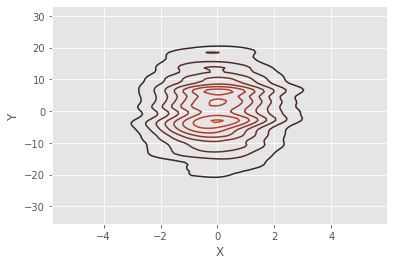

In [22]:
sns.kdeplot(df.X, df.Y, bw=1)

- seabornに用意されたBWを使ってみる

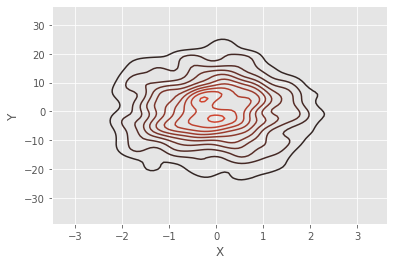

In [23]:
sns.kdeplot(df.X, df.Y, bw='silverman')

- 同時分布のカーネル密度推定も可能

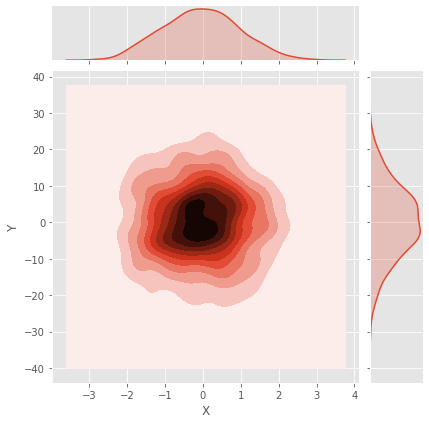

In [25]:
# jointplotで種類をKDEにすることで、カーネル密度推定の同時分布が出力される
sns.jointplot('X', 'Y', df, kind='kde')